In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# Question 1

(a) Implement a general function for numerically solving the
general two-point boundary value problem (TPBVP).

In [2]:
def fd2tpbvp(p,q,r,alpha,beta,m):
    
    Ah = zeros((m,m))
    fh = zeros(m)
    h = 1/(m+1)
    Uh = zeros(m)
    
    for j in range(m):
        xj = (j+1)*h
        
        Ah[j,j] = -2/h**2-q(xj)
        
        
        if j == 0:
            Ah[j,j+1] = 1/h**2 - p(xj)/(2*h)
            fh[j] = r(xj) - (1/h**2 + p(xj)/(2*h))*alpha
            
        elif 1 <= j < m-1:
            Ah[j,j+1] = 1/h**2 - p(xj)/(2*h)
            Ah[j,j-1] = 1/h**2 + p(xj)/(2*h)
            fh[j] = r(xj)
            
        else:
            Ah[j,j-1] = 1/h**2 + p(xj)/(2*h)
            fh[j] = r(xj) - (1/h**2 - p(xj)/(2*h))*beta
            
    Uh = solve(Ah, fh)
    
    return Uh

(b) 

In [3]:
p = lambda x: 2*tan(x)
q = lambda x: 0
r = lambda x: 2
uexact = lambda x: (x-1)*tan(x)

alpha = 0
beta = 0
m = 80
x = linspace(0,1,m+2)
x = x[1:-1]

U10 = fd2tpbvp(p,q,r,alpha,beta,m)

In [4]:
ue = uexact(x)

<IPython.core.display.Javascript object>


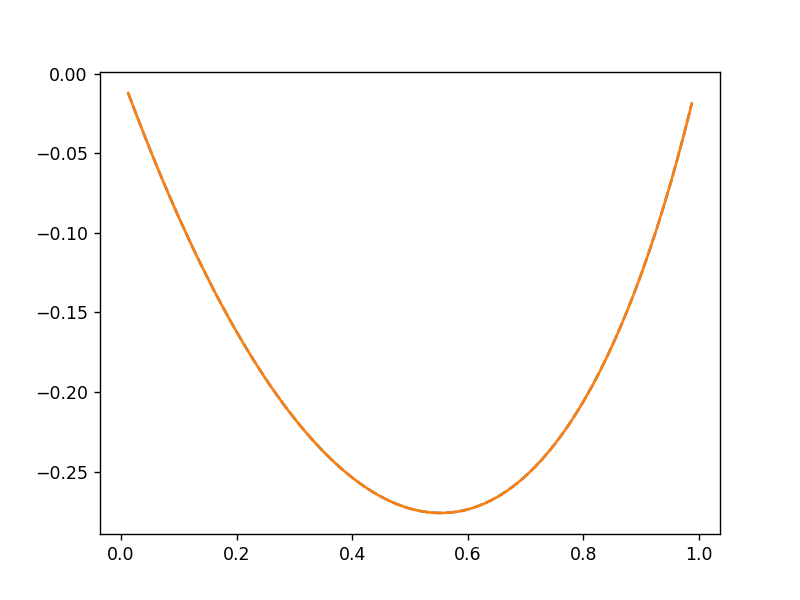

In [5]:
plot(x,U10, '--')
plot(x,ue)
show()

Compare the approximate solution to the exact solution using $m = 10, 20, 40, 80, 160$ equally spaced interior points over
$[0, 1]$ (i.e. $x_j = jh,\quad j = 1, . . . , m$, with $h = 1/(m + 1))$.

Relative two-norm.

In [6]:
def Relative2Norm(Uh,U_exact):
    
    '''
    RelativeL2Norm(U_approx,U_exact)
    
    calculates the relative 2-norm of the erros in approximations of first and second derivatives
    
    Arguments:
    ----------
    
    Uh: array that contains the approximation values of the derivative
    U_exact: array that contains the exact values of the derivative
    
    Returns:
    --------
    
    L2N: relative tow-norm of the errors of the approximation of the derivative
    
    '''
    
        
    Rn = (Uh - U_exact)**2
        
    L2N = sqrt(sum(Rn)/sum(U_exact**2))
        
    return L2N  

In [7]:
alpha = 0
beta = 0

m = [10,20,40,80,160]
Error = []

for mj in m:
    
    x = linspace(0,1,mj+2)
    x = x[1:-1]
    Uh = fd2tpbvp(p,q,r,alpha,beta,mj)
    UE = uexact(x)
    
    L2N = Relative2Norm(Uh,UE)
    Error.append(L2N)
    

In [8]:
Error

[0.0030037788987075193,
 0.0008245889840638876,
 0.00021635183489803953,
 5.5433372841429574e-05,
 1.4031137967464884e-05]

In [9]:
p = polyfit(log(m),log(Error),1)
p[0]

-1.9378854076711913

The slope is almost 2 therefore the approximate solution is second-order accurate.